4422102/4422102 [==============================] - 0s 0us/step


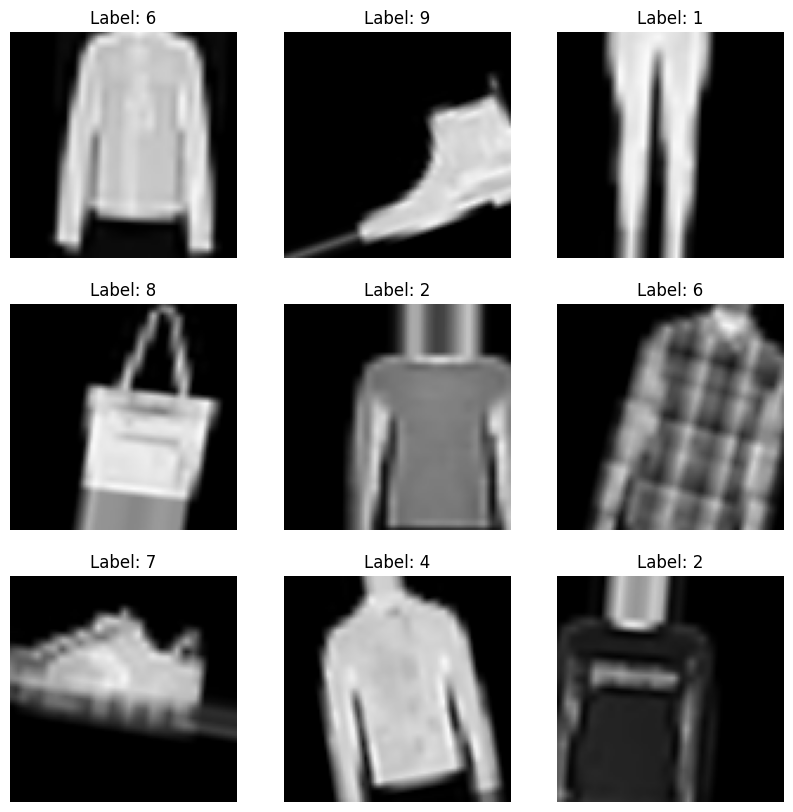

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
1500/1500 [==============================] - 149s 97ms/step - loss: 0.5327 - accuracy: 0.8085 - val_loss: 0.3863 - val_accuracy: 0.8575
Epoch 2/10
1500/1500 [==============================] - 145s 96ms/step - loss: 0.4395 - accuracy: 0.8379 - val_loss: 0.3820 - val_accuracy: 0.8568
Epoch 3/10
1500/1500 [==============================] - 141s 94ms/step - loss: 0.4171 - accuracy: 0.8461 - val_loss: 0.3923 - val_accuracy: 0.8557
Epoch 4/10
1500/1500 [==============================] - 140s 94ms/step - loss: 0.4025 - accuracy: 0.8507 - val_loss: 0.3611 - val_accuracy: 0.8658
Epoch 5/10
1500/1500 [==============================] - 140s 93ms/step - loss: 0.3890 - accuracy: 0.8548 - val_loss: 0.3492 - val_accuracy: 0.8708
Epoch 6/10
1500/1500 [==============================] - 139s 93ms/step - loss: 0.3774 - accuracy: 0.8602 - val_loss: 0.3502 - val_accuracy: 0.8727
Epoch 7/10
1500/1500 [==============================] -

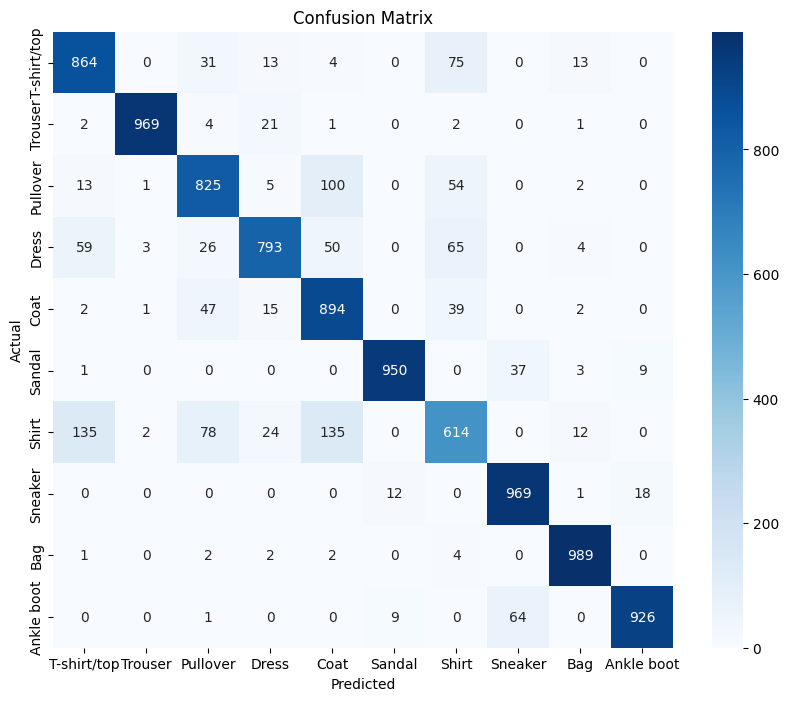

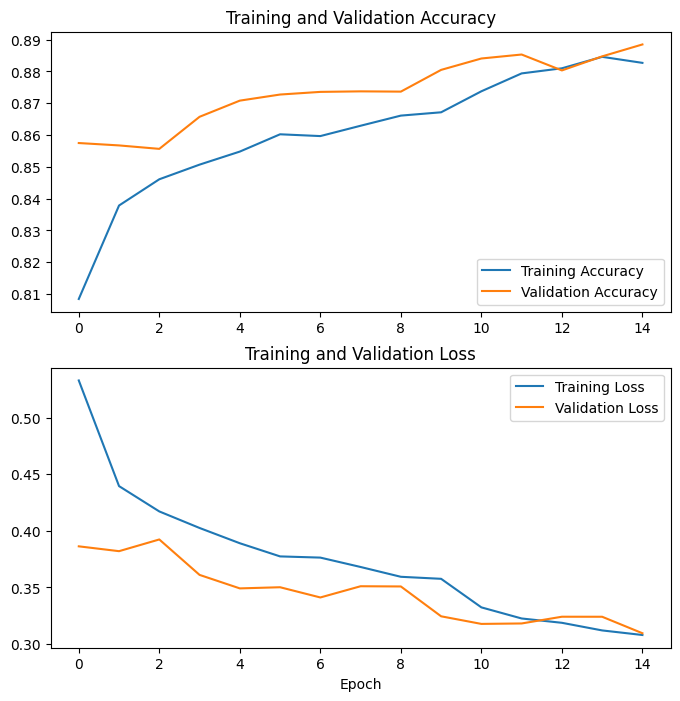

Epoch 1/10
1500/1500 [==============================] - 81s 52ms/step - loss: 0.3765 - accuracy: 0.8644 - val_loss: 0.3070 - val_accuracy: 0.8842
Epoch 2/10
1500/1500 [==============================] - 76s 51ms/step - loss: 0.2783 - accuracy: 0.8971 - val_loss: 0.2865 - val_accuracy: 0.8957
Epoch 3/10
1500/1500 [==============================] - 78s 52ms/step - loss: 0.2465 - accuracy: 0.9088 - val_loss: 0.2947 - val_accuracy: 0.8890
Epoch 4/10
1500/1500 [==============================] - 78s 52ms/step - loss: 0.2218 - accuracy: 0.9173 - val_loss: 0.2811 - val_accuracy: 0.8991
Epoch 5/10
1500/1500 [==============================] - 77s 51ms/step - loss: 0.2022 - accuracy: 0.9228 - val_loss: 0.3064 - val_accuracy: 0.8938
Epoch 6/10
1500/1500 [==============================] - 77s 51ms/step - loss: 0.1821 - accuracy: 0.9301 - val_loss: 0.3061 - val_accuracy: 0.8962
Epoch 7/10
1500/1500 [==============================] - 77s 51ms/step - loss: 0.1661 - accuracy: 0.9369 - val_loss: 0.2963 -

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the Fashion-MNIST dataset
# The dataset contains grayscale images of 10 categories of clothing items, each sized 28x28 pixels
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data: scale pixel values to the range [0, 1]
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Split the dataset: Use 80% of the training data for training and 20% for validation
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42)

# Convert grayscale images to RGB by repeating the grayscale channel across three channels
# The MobileNetV2 model expects 3-channel images
x_train_rgb = np.repeat(x_train[..., np.newaxis], 3, axis=-1)
x_val_rgb = np.repeat(x_val[..., np.newaxis], 3, axis=-1)
x_test_rgb = np.repeat(x_test[..., np.newaxis], 3, axis=-1)

# Resize all images to 96x96 to match the input size required by MobileNetV2
input_size = (96, 96)

def resize_images(images):
    # Resize images using bilinear interpolation
    images_resized = tf.image.resize(images, input_size)
    return images_resized.numpy()

# Resize the training, validation, and test sets
x_train_resized = resize_images(x_train_rgb)
x_val_resized = resize_images(x_val_rgb)
x_test_resized = resize_images(x_test_rgb)

# Create an ImageDataGenerator for data augmentation
# Apply transformations like random rotations, zooming, horizontal flips, and shifts
train_datagen = ImageDataGenerator(
    rotation_range=20,          # Randomly rotate images in the range (degrees, 0 to 20)
    zoom_range=0.15,            # Randomly zoom image
    width_shift_range=0.2,      # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,     # Randomly shift images vertically (fraction of total height)
    horizontal_flip=True,       # Randomly flip images
    fill_mode='nearest'         # Fill pixels that are lost after transformation
)

# For validation and test data, we just need to rescale
# No augmentation is applied to validation and test data
val_datagen = ImageDataGenerator()

# Prepare data generators
batch_size = 32

# Training data generator with augmentation
train_generator = train_datagen.flow(
    x_train_resized, y_train,
    batch_size=batch_size
)

# Validation data generator without augmentation
validation_generator = val_datagen.flow(
    x_val_resized, y_val,
    batch_size=batch_size,
    shuffle=False  # We can set shuffle to False for validation data
)

# Function to visualize augmented images
def visualize_augmented_images(generator):
    # Get a batch of images and labels
    x_batch, y_batch = next(generator)
    # Scale images to [0, 255] and convert to uint8 for visualization
    x_batch = x_batch * 255
    x_batch = x_batch.astype('uint8')
    # Plot images
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(x_batch[i])
        plt.title('Label: %d' % y_batch[i])
        plt.axis('off')
    plt.show()

# Visualize augmented images
visualize_augmented_images(train_generator)

# Load the MobileNetV2 model pre-trained on ImageNet, without the top classification layer
# The model will be used as the base model for transfer learning
base_model = keras.applications.MobileNetV2(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze all layers in the base model
base_model.trainable = False

# Add custom layers for feature extraction and classification
# The output of the base model is passed to a global average pooling layer
# Then a dense layer with ReLU activation
# Finally, a softmax output layer with 10 units for the 10 classes
inputs = keras.Input(shape=(96, 96, 3))
x = base_model(inputs, training=False)  # Set training=False to ensure batch normalization layers run in inference mode
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile the model
# Use the Adam optimizer with default learning rate
# Use sparse categorical cross-entropy loss since labels are integers
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 10  # Number of epochs for initial training

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Unfreeze the last few layers for fine-tuning
base_model.trainable = True

# Unfreeze the last 10 layers
fine_tune_at = len(base_model.layers) - 10

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Re-compile the model with a lower learning rate for fine-tuning
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training the model with fine-tuning
fine_tune_epochs = 5  # Number of epochs for fine-tuning
total_epochs = epochs + fine_tune_epochs

history_fine = model.fit(
    train_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1] + 1,
    validation_data=validation_generator
)

# Create a test data generator
# No augmentation or shuffling is needed for the test data
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow(
    x_test_resized, y_test,
    batch_size=batch_size,
    shuffle=False
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Get predictions on the test set
# Since the generator does not shuffle, the order of predictions corresponds to the order of labels
y_pred_probs = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Generate a confusion matrix and a classification report
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Class labels for Fashion-MNIST
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Classification report
class_report = classification_report(
    y_test, y_pred_classes, target_names=class_names)

print('Classification Report:')
print(class_report)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plot training and validation accuracy and loss curves
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

epochs_range = range(total_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

# Optional: Train a model without data augmentation for comparison

# Create a data generator without augmentation
train_datagen_no_aug = ImageDataGenerator()

train_generator_no_aug = train_datagen_no_aug.flow(
    x_train_resized, y_train,
    batch_size=batch_size
)

# Re-initialize the model
# For comparison, we can create a new instance of the model

# Load the MobileNetV2 model pre-trained on ImageNet, without the top classification layer
base_model_no_aug = keras.applications.MobileNetV2(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze all layers in the base model
base_model_no_aug.trainable = False

# Add custom layers
inputs_no_aug = keras.Input(shape=(96, 96, 3))
x_no_aug = base_model_no_aug(inputs_no_aug, training=False)
x_no_aug = layers.GlobalAveragePooling2D()(x_no_aug)
x_no_aug = layers.Dense(128, activation='relu')(x_no_aug)
outputs_no_aug = layers.Dense(10, activation='softmax')(x_no_aug)
model_no_aug = keras.Model(inputs_no_aug, outputs_no_aug)

# Compile the model
model_no_aug.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model without data augmentation
epochs_no_aug = 10

history_no_aug = model_no_aug.fit(
    train_generator_no_aug,
    epochs=epochs_no_aug,
    validation_data=validation_generator
)

# Evaluate the model without data augmentation on the test set
test_loss_no_aug, test_acc_no_aug = model_no_aug.evaluate(test_generator)
print('Test accuracy without data augmentation:', test_acc_no_aug)
